# Final Project : COVID-19 Analysis and Visulization
##### Author: Shawn, Eric, Shizhe Zeng

Welcome! We first import some needed packages.

In [6]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

## Goal
$\color{red}{\text{ADD MORE HERE}}$.
The goal of this part of the project is to make a linear model to predict mortality rates in different states and countries. 

#  §1. Preparing Data

### 1.1 Loading the data

First, Let's first load the data and clean up outliers and NaN values.
<br>Here, we are trying to have a first impression of the data, see what is included and get an intuition of what might be correlated or useful in later analysis.

In [7]:
def col_example(data):
    for col in data.columns: 
        print(col,":    ", data[col][0:3].values,"") 

In [8]:
data_death0 = pd.read_csv('time_series_covid19_deaths_US.csv')
data_death1 = data_death0.copy()
print(data_death1.columns[:13].values,"...",data_death1.columns[-2:].values,"\n | Shape:", data_death1.shape)
data_death1.iloc[:,:13].head()
#data_time_death['Combined_Key'].value_counts()

['UID' 'iso2' 'iso3' 'code3' 'FIPS' 'Admin2' 'Province_State'
 'Country_Region' 'Lat' 'Long_' 'Combined_Key' 'Population' '1/22/20'] ... ['4/17/20' '4/18/20'] 
 | Shape: (3255, 100)


,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,Population,1/22/20
0,16,AS,ASM,16,60.0,NaN,American Samoa,US,-14.2710,-170.1320,"American Samoa, US",55641,0
1,316,GU,GUM,316,66.0,NaN,Guam,US,13.4443,144.7937,"Guam, US",164229,0
2,580,MP,MNP,580,69.0,NaN,Northern Mariana Islands,US,15.0979,145.6739,"Northern Mariana Islands, US",55144,0
3,630,PR,PRI,630,72.0,NaN,Puerto Rico,US,18.2208,-66.5901,"Puerto Rico, US",2933408,0
4,850,VI,VIR,850,78.0,NaN,Virgin Islands,US,18.3358,-64.8963,"Virgin Islands, US",107268,0


In [9]:
data_conf0 = pd.read_csv('time_series_covid19_confirmed_US.csv')
data_conf1 = data_conf0.copy()
print(data_conf1.columns[:13].values,"...", data_conf1.columns[-2:].values,"\n | Shape:", data_conf1.shape)
#data_conf1.head()
#print(data_conf1['Combined_Key'].value_counts())
data_conf1.iloc[:,0:13].head()

['UID' 'iso2' 'iso3' 'code3' 'FIPS' 'Admin2' 'Province_State'
 'Country_Region' 'Lat' 'Long_' 'Combined_Key' '1/22/20' '1/23/20'] ... ['4/17/20' '4/18/20'] 
 | Shape: (3255, 99)


,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,1/22/20,1/23/20
0,16,AS,ASM,16,60.0,NaN,American Samoa,US,-14.2710,-170.1320,"American Samoa, US",0,0
1,316,GU,GUM,316,66.0,NaN,Guam,US,13.4443,144.7937,"Guam, US",0,0
2,580,MP,MNP,580,69.0,NaN,Northern Mariana Islands,US,15.0979,145.6739,"Northern Mariana Islands, US",0,0
3,630,PR,PRI,630,72.0,NaN,Puerto Rico,US,18.2208,-66.5901,"Puerto Rico, US",0,0
4,850,VI,VIR,850,78.0,NaN,Virgin Islands,US,18.3358,-64.8963,"Virgin Islands, US",0,0


In [10]:
data_states0 = pd.read_csv('4.18states.csv')
data_states1 = data_states0.copy()
#col_example(data_states1)
#print(data_states1["Province_State"].unique())
print(data_states1["Country_Region"].unique(),"\n | Shape:", data_states1.shape)
data_states1.head()

['US' 'Canada' 'United Kingdom' 'China' 'Netherlands' 'Australia'
 'Denmark' 'France'] 
 | Shape: (140, 18)


,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
0,Alabama,US,2020-04-18 22:32:47,32.3182,-86.9023,4712,153,NaN,4559.0,1.0,100.492717,42538.0,620.0,3.247029,84000001,USA,907.206961,13.157895
1,Alaska,US,2020-04-18 22:32:47,61.3707,-152.4044,314,9,147.0,305.0,2.0,52.530410,9655.0,39.0,2.866242,84000002,USA,1615.226458,12.420382
2,American Samoa,US,NaN,-14.2710,-170.1320,0,0,NaN,NaN,60.0,0.000000,3.0,NaN,NaN,16,ASM,5.391708,NaN
3,Arizona,US,2020-04-18 22:32:47,33.7298,-111.4312,4724,180,539.0,4544.0,4.0,64.901548,51045.0,566.0,3.810330,84000004,USA,701.291175,11.981372
4,Arkansas,US,2020-04-18 22:32:47,34.9697,-92.3731,1744,38,703.0,1706.0,5.0,67.361213,24141.0,291.0,2.178899,84000005,USA,932.435235,16.685780


In [11]:
data_counties0 = pd.read_csv('abridged_couties.csv')
data_counties1 = data_counties0.copy()
print(data_counties1["StateName"].unique(),"\n | Shape:", data_counties1.shape)
#col_example(data_counties1)
data_counties1.head()
#original_data2['COUNTYFP'].value_counts()

['AL' 'AK' 'AZ' 'AR' 'CA' 'CO' 'CT' 'DE' 'DC' 'FL' 'GA' 'HI' 'ID' 'IL'
 'IN' 'IA' 'KS' 'KY' 'LA' 'ME' 'MD' 'MA' 'MI' 'MN' 'MS' 'MO' 'MT' 'NE'
 'NV' 'NH' 'NJ' 'NM' 'NY' 'NC' 'ND' 'OH' 'OK' 'OR' 'PA' 'RI' 'SC' 'SD'
 'TN' 'TX' 'UT' 'VT' 'VA' 'WA' 'WV' 'WI' 'WY' 'AS' 'MP' 'GU' 'PR' 'VI'] 
 | Shape: (3244, 87)


,countyFIPS,STATEFP,COUNTYFP,CountyName,StateName,State,lat,lon,POP_LATITUDE,POP_LONGITUDE,...,>500 gatherings,public schools,restaurant dine-in,entertainment/gym,federal guidelines,foreign travel ban,SVIPercentile,HPSAShortage,HPSAServedPop,HPSAUnderservedPop
0,01001,1.0,1.0,Autauga,AL,Alabama,32.540091,-86.645649,32.500389,-86.494165,...,737497.0,737500.0,737503.0,737512.0,737500.0,737495.0,0.4354,NaN,NaN,NaN
1,01003,1.0,3.0,Baldwin,AL,Alabama,30.738314,-87.726272,30.548923,-87.762381,...,737497.0,737500.0,737503.0,737512.0,737500.0,737495.0,0.2162,NaN,NaN,NaN
2,01005,1.0,5.0,Barbour,AL,Alabama,31.874030,-85.397327,31.844036,-85.310038,...,737497.0,737500.0,737503.0,737512.0,737500.0,737495.0,0.9959,6.08,5400.0,18241.0
3,01007,1.0,7.0,Bibb,AL,Alabama,32.999024,-87.125260,33.030921,-87.127659,...,737497.0,737500.0,737503.0,737512.0,737500.0,737495.0,0.6003,2.75,14980.0,6120.0
4,01009,1.0,9.0,Blount,AL,Alabama,33.990440,-86.562711,33.955243,-86.591491,...,737497.0,737500.0,737503.0,737512.0,737500.0,737495.0,0.4242,7.21,31850.0,25233.0


<br>After going through the data, we see that at our disposal are 4 data sets:
<br>from CSSE at JHU:
1. *time_series_covid19_deaths_US* : 
<br>US deaths time series by Province_State, lat, long, population, etc.| from 1/22 to 4/18, 88 days
2. *time_series_covid19_confirmed_US*
<br>US deaths time series by Province_State, lat, long, etc.| from 1/22 to 4/18, 88 days
3. *4.18states* : 
<br>8 countries ('US' 'Canada' 'United Kingdom' 'China' 'Netherlands' 'Australia' 'Denmark' 'France'), country related info | Confirmed, Death, Recovered, tested | Mortality_Rate, Hospitalization_Rate and COVID related info.| updated at 4/18

<br> from Yu-Group, EECS, UCB:
4. *abridged_couties* 
<br> 56 regions in US, lat, long, Census info, pop estimates, different kinds mortality rates, pop categories, numbers of gatherings, and other county info.

### 1.2 Cleaning the data

#####  Missing Values

First we will look at missing values.

In [12]:
data_counties1.isnull().sum()

countyFIPS               0
STATEFP                 23
COUNTYFP                23
CountyName               0
StateName                0
                      ... 
foreign travel ban      25
SVIPercentile          104
HPSAShortage          1141
HPSAServedPop         1141
HPSAUnderservedPop    1141
Length: 87, dtype: int64

We should replace the NaN values of 'stay at home', 'public school', and '>500 gatherings' with the average value in their states. 

**For Now** for simplicity I will replace all values in the three columns with an average value of the whole table (which is incorrect but convenient). 

**An idea** We can also fill all the NaN values with .isna(method = 'ffill') to fill all the values with previous valid values, which saves more time and should work well, given that adjacent counties are likely to be in the same state.


In [61]:
def drop_na_vals(data, col_names):
    """
    Drop from data all rows that have nan values in col_names columns
    """
    return data.dropna(subset = col_names)

timestamps = ['stay at home', 'public schools', '>500 gatherings', 'entertainment/gym', 'restaurant dine-in']

In [59]:
data_counties1 = drop_na_vals(data_counties1, timestamps)
data_counties1_zeros = data_counties1.isnull().sum()
data_counties1_zeros[data_counties1_zeros != 0]

State                                  67
lat                                    67
lon                                    67
#EligibleforMedicare2018                7
MedicareEnrollment,AgedTot2017          9
3-YrDiabetes2015-17                  1344
DiabetesPercentage                      1
HeartDiseaseMortality                   7
StrokeMortality                         7
dem_to_rep_ratio                       27
3-YrMortalityAge<1Year2015-17        2209
3-YrMortalityAge1-4Years2015-17      2589
3-YrMortalityAge5-14Years2015-17     2562
3-YrMortalityAge15-24Years2015-17    2060
3-YrMortalityAge25-34Years2015-17    1753
3-YrMortalityAge35-44Years2015-17    1444
3-YrMortalityAge45-54Years2015-17     736
3-YrMortalityAge55-64Years2015-17     299
3-YrMortalityAge65-74Years2015-17     192
3-YrMortalityAge75-84Years2015-17     139
3-YrMortalityAge85+Years2015-17       115
mortality2015-17Estimated            2562
SVIPercentile                           1
HPSAShortage                      

Then, we need to change all the ordinals into timestamps for readability.

In [15]:
def to_stamp_cols(data, col_names):
    """
    Converts ordinals into timestamps in col_names columns
    """
    for name in col_names:
        data[name] = data[name].apply(lambda x: pd.Timestamp.fromordinal(int(x)))
    return data

In [16]:
data_counties1 = to_stamp_cols(data_counties1, timestamps) 
data_counties1.head()

,countyFIPS,STATEFP,COUNTYFP,CountyName,StateName,State,lat,lon,POP_LATITUDE,POP_LONGITUDE,...,>500 gatherings,public schools,restaurant dine-in,entertainment/gym,federal guidelines,foreign travel ban,SVIPercentile,HPSAShortage,HPSAServedPop,HPSAUnderservedPop
0,01001,1.0,1.0,Autauga,AL,Alabama,32.540091,-86.645649,32.500389,-86.494165,...,2020-03-13,2020-03-16,2020-03-19,2020-03-28,2020-03-16,2020-03-11,0.4354,NaN,NaN,NaN
1,01003,1.0,3.0,Baldwin,AL,Alabama,30.738314,-87.726272,30.548923,-87.762381,...,2020-03-13,2020-03-16,2020-03-19,2020-03-28,2020-03-16,2020-03-11,0.2162,NaN,NaN,NaN
2,01005,1.0,5.0,Barbour,AL,Alabama,31.874030,-85.397327,31.844036,-85.310038,...,2020-03-13,2020-03-16,2020-03-19,2020-03-28,2020-03-16,2020-03-11,0.9959,6.08,5400.0,18241.0
3,01007,1.0,7.0,Bibb,AL,Alabama,32.999024,-87.125260,33.030921,-87.127659,...,2020-03-13,2020-03-16,2020-03-19,2020-03-28,2020-03-16,2020-03-11,0.6003,2.75,14980.0,6120.0
4,01009,1.0,9.0,Blount,AL,Alabama,33.990440,-86.562711,33.955243,-86.591491,...,2020-03-13,2020-03-16,2020-03-19,2020-03-28,2020-03-16,2020-03-11,0.4242,7.21,31850.0,25233.0


Next, let's look at the date of the first discovered case (death) in each county. 

In [20]:
def find_first_date(data, cap):
    """
    Find the earliest date that the number of confirmed case (death) reached cap in each county, return in a series
    """
    data = data.loc[:, '1/22/20':'4/18/20']
    return data.keys()[np.argmax(data.values > cap,axis=1)]

data_conf1['First_Case'] = find_first_date(data_conf1, 0)
data_conf1['First_Hundred_Case'] = find_first_date(data_conf1, 100)
data_death1['First_Death'] = find_first_date(data_death1, 0)

Drop all counties that never had any cases/deaths from the respective tables. And convert the string to timestamp

In [21]:
data_conf1 = data_conf1.drop(data_conf1[data_conf1["First_Case"] == "1/22/20"].index)
data_death1 = data_death1.drop(data_death1[data_death1["First_Death"] == "1/22/20"].index)
data_conf1["First_Case"] = pd.to_datetime(data_conf1["First_Case"], infer_datetime_format = True)
data_conf1["First_Hundred_Case"] = pd.to_datetime(data_conf1["First_Hundred_Case"], infer_datetime_format = True)
data_death1["First_Death"] = pd.to_datetime(data_death1["First_Death"], infer_datetime_format = True)
data_death1.head()

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,First_Death
1,316,GU,GUM,316,66.0,NaN,Guam,US,13.444300,144.793700,...,4,5,5,5,5,5,5,5,5,2020-03-22
2,580,MP,MNP,580,69.0,NaN,Northern Mariana Islands,US,15.097900,145.673900,...,2,2,2,2,2,2,2,2,2,2020-04-01
3,630,PR,PRI,630,72.0,NaN,Puerto Rico,US,18.220800,-66.590100,...,39,42,44,45,45,51,56,58,60,2020-03-21
4,850,VI,VIR,850,78.0,NaN,Virgin Islands,US,18.335800,-64.896300,...,1,1,1,1,1,1,1,2,3,2020-04-05
5,84001001,US,USA,840,1001.0,Autauga,Alabama,US,32.539527,-86.644082,...,1,1,1,1,1,1,1,2,2,2020-04-07


While we're at it, we can extract the county name in the time series, and drop some of the stuff we won't use, too.

In [22]:
data_conf1['County_Name'] = data_conf1['Combined_Key'].str.split(',').str[0]
data_first_case = data_conf1[['Province_State', 'First_Case', 'First_Hundred_Case', 'County_Name']]
data_death1['County_Name'] = data_death1['Combined_Key'].str.split(',').str[0]
data_first_death = data_death1[['Province_State', 'First_Death', 'County_Name']]
data_first_death.head(10)

,Province_State,First_Death,County_Name
1,Guam,2020-03-22,Guam
2,Northern Mariana Islands,2020-04-01,Northern Mariana Islands
3,Puerto Rico,2020-03-21,Puerto Rico
4,Virgin Islands,2020-04-05,Virgin Islands
5,Alabama,2020-04-07,Autauga
6,Alabama,2020-03-29,Baldwin
12,Alabama,2020-04-17,Calhoun
13,Alabama,2020-03-29,Chambers
21,Alabama,2020-04-07,Colbert
23,Alabama,2020-04-14,Coosa


Text(0, 0.5, 'Number of Counties')

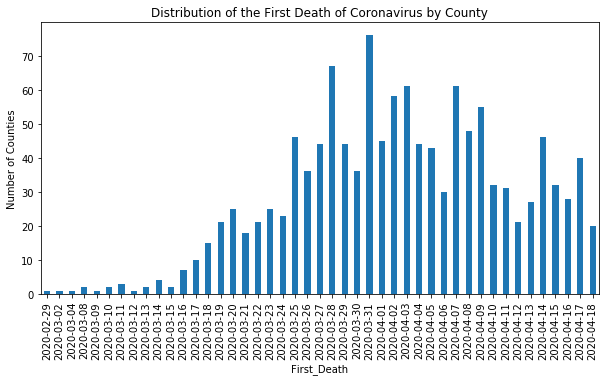

In [27]:
plt.figure(figsize = (10,5))
data_first_death.groupby(data_first_death["First_Death"].dt.date).County_Name.count().plot(kind="bar")
plt.title("Distribution of the First Death of Coronavirus by County")
plt.ylabel("Number of Counties")

# §2. EDA and Model #1
Specifically, we explore on 2 data sets: abridged_couties & 4.18states

### 2.1 Mortality rate

Let's do some visualization and see whether there are some relationship between different variables.

### Mortality rates' outlier and overlapping points

Plot the distribution of mortality rate and see if we can find something interesting.

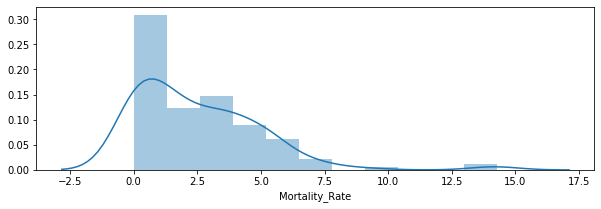

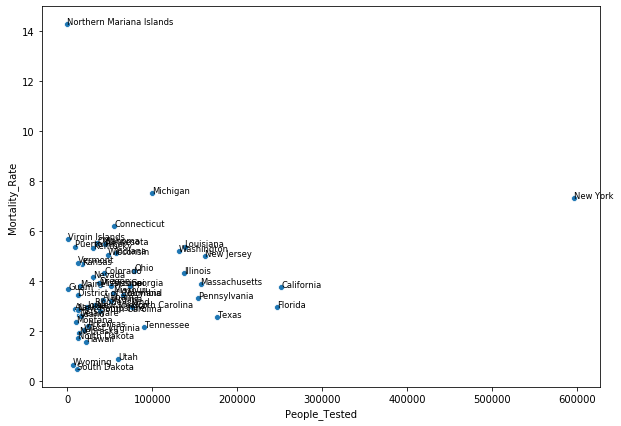

In [28]:
#added 5/10 sunday by Jack
mortality_rate = data_states1['Mortality_Rate']


plt.figure(figsize = (10,3))
sns.distplot(data_states1['Mortality_Rate'])
plt.figure(figsize = (10,7))
p1 = sns.scatterplot(x=data_states1['People_Tested'],y=data_states1['Mortality_Rate'])

for line in range(0,data_states1.shape[0]):
  if data_states1['People_Tested'][line] >0 and data_states1['Mortality_Rate'][line] >0:
     p1.text(data_states1['People_Tested'][line]+0.2, data_states1['Mortality_Rate'][line], data_states1['Province_State'][line],
         #data_states1['People_Tested'],data_states1['Mortality_Rate'],data_states1['Province_State'], 
             horizontalalignment='left', size='small', color='black') #, weight='semibold')

In [0]:
#mortality_rate.value_counts()
#data_states1[data_states1['Mortality_Rate']>8]

Two interesting things to note: 

1: overlapping: there are 28 points of 0 mortality rate.

2: outliers: three states have mortality rate>8%. It seems like they have high mortality rates because they have pretty small population? The confirmed cases and death cases are pretty low.

### Update state representation

For table 2, there are >150 entries with NaN values in "State". Here we add a new column to table 2 called "State update", where we fill in the NaN values for State based on the state abbreviation column.

In [29]:
state_abbreviation = data_counties1.groupby(['StateName', 'State']).agg(sum)#['StateName']
state_dict_original = state_abbreviation.reset_index()[['StateName', 'State']]
new_state_df = pd.DataFrame({'StateName': ['AK','VI', 'PR', "HI", 'GU',"AS",'MP'], 
                             'State': ['Alaska', 'Virgin Islands','Puerto Rico','Hawaii', "Guam",'American Samoa'
                                      ,'Northern Marianas']})
state_dict_combined = pd.concat([state_dict_original, new_state_df])
state_dict = state_dict_combined.set_index('StateName')['State']
mapped_state = data_counties1['StateName'].map(state_dict)
mapped_state.isna().sum()
#state_dict

0

### Append mortality to table 2

Here we add a new column to table 2 called "Mortality Rate", which corresponds to the "Mortality_Rate" column in table 1, and mapped the mortality rate to each county based on which state it is in.

**Question about methodology**: Is it valid to take the aggregate data from a bigger granularity (state) to a data of lower granularity (county)? The mortality rate in different county is different, and since each county has different population, we cannot generalize one state's mortality rate to all counties in it?



In [30]:
data_counties1['State updated'] = mapped_state
mortality_dict = data_states1[data_states1['Country_Region'] == 'US'][['Province_State', 'Mortality_Rate']].set_index('Province_State')['Mortality_Rate']
mapped_mortality = data_counties1['State updated'].map(mortality_dict)
mapped_mortality.isna().sum() #should be American Samoa 
data_counties1['Mortality Rate'] = mapped_mortality
data_counties1.head()

,countyFIPS,STATEFP,COUNTYFP,CountyName,StateName,State,lat,lon,POP_LATITUDE,POP_LONGITUDE,...,restaurant dine-in,entertainment/gym,federal guidelines,foreign travel ban,SVIPercentile,HPSAShortage,HPSAServedPop,HPSAUnderservedPop,State updated,Mortality Rate
0,01001,1.0,1.0,Autauga,AL,Alabama,32.540091,-86.645649,32.500389,-86.494165,...,2020-03-19,2020-03-28,2020-03-16,2020-03-11,0.4354,NaN,NaN,NaN,Alabama,3.247029
1,01003,1.0,3.0,Baldwin,AL,Alabama,30.738314,-87.726272,30.548923,-87.762381,...,2020-03-19,2020-03-28,2020-03-16,2020-03-11,0.2162,NaN,NaN,NaN,Alabama,3.247029
2,01005,1.0,5.0,Barbour,AL,Alabama,31.874030,-85.397327,31.844036,-85.310038,...,2020-03-19,2020-03-28,2020-03-16,2020-03-11,0.9959,6.08,5400.0,18241.0,Alabama,3.247029
3,01007,1.0,7.0,Bibb,AL,Alabama,32.999024,-87.125260,33.030921,-87.127659,...,2020-03-19,2020-03-28,2020-03-16,2020-03-11,0.6003,2.75,14980.0,6120.0,Alabama,3.247029
4,01009,1.0,9.0,Blount,AL,Alabama,33.990440,-86.562711,33.955243,-86.591491,...,2020-03-19,2020-03-28,2020-03-16,2020-03-11,0.4242,7.21,31850.0,25233.0,Alabama,3.247029


Plot when does each county discover the first case/death casued by the virus

Text(0, 0.5, 'Number of Counties')

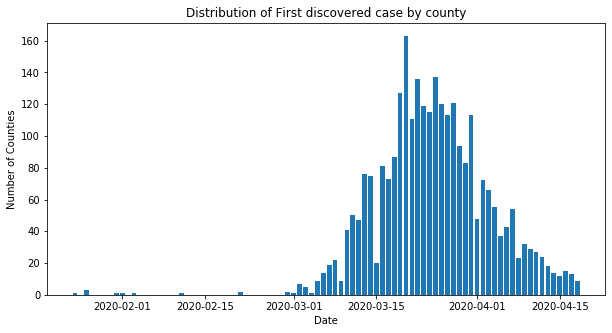

In [33]:
first_case_count = data_conf1['First_Case'].value_counts()
plt.figure(figsize=(10, 5))
plt.bar(first_case_count.index, first_case_count.values)
plt.title("Distribution of First discovered case by county")
plt.xlabel("Date")
plt.ylabel("Number of Counties")

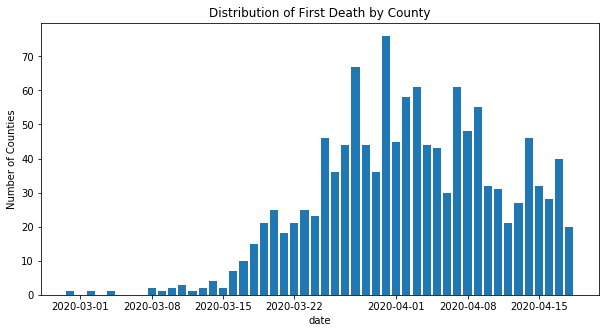

In [36]:
first_death_count = data_death1['First_Death'].value_counts()
plt.figure(figsize=(10, 5))
plt.bar(first_death_count.index, first_death_count.values)
plt.title("Distribution of First Death by County")
plt.xlabel("date")
plt.ylabel("Number of Counties")
plt.show()

### Feature Selection

To begin with, we first take an "educated guess" and select a few features of interest in the second table, which we think will affect the death rate of Covid 19. 

We also want to drop American Samoa and Northern Marianas because they do not have mortality rates. We also manually fill in the mortality rate for DC (don't know why it was not there). 

In [37]:
operate_data_counties1 = data_counties1[['CountyName', 'State updated', 'stay at home', 'public schools', '>500 gatherings', 'entertainment/gym', 'restaurant dine-in',
                                 'Mortality Rate']][data_counties1['State updated'] != 'American Samoa'][data_counties1['State updated'] != 'Northern Marianas']
#operate_data_counties1[operate_data_counties1['CountyName']=='Washington']
operate_data_counties1['Mortality Rate'] = operate_data_counties1['Mortality Rate'].fillna(3.413353)
operate_data_counties1_with_states = operate_data_counties1
operate_data_counties1_with_states

,CountyName,State updated,stay at home,public schools,>500 gatherings,entertainment/gym,restaurant dine-in,Mortality Rate
0,Autauga,Alabama,2020-04-04,2020-03-16,2020-03-13,2020-03-28,2020-03-19,3.247029
1,Baldwin,Alabama,2020-04-04,2020-03-16,2020-03-13,2020-03-28,2020-03-19,3.247029
2,Barbour,Alabama,2020-04-04,2020-03-16,2020-03-13,2020-03-28,2020-03-19,3.247029
3,Bibb,Alabama,2020-04-04,2020-03-16,2020-03-13,2020-03-28,2020-03-19,3.247029
4,Blount,Alabama,2020-04-04,2020-03-16,2020-03-13,2020-03-28,2020-03-19,3.247029
...,...,...,...,...,...,...,...,...
3235,Petersburg Borough,Alaska,2020-03-28,2020-03-19,2020-03-24,2020-03-17,2020-03-17,2.866242
3236,Prince of Wales-Hyder Census Area,Alaska,2020-03-28,2020-03-19,2020-03-24,2020-03-17,2020-03-17,2.866242
3237,Skagway Municipality,Alaska,2020-03-28,2020-03-19,2020-03-24,2020-03-17,2020-03-17,2.866242
3238,Wrangell City and Borough,Alaska,2020-03-28,2020-03-19,2020-03-24,2020-03-17,2020-03-17,2.866242


###  Missing Values

#2 Now we will look at missing values.

In [38]:
operate_data_counties1.isnull().sum()

CountyName            0
State updated         0
stay at home          0
public schools        0
>500 gatherings       0
entertainment/gym     0
restaurant dine-in    0
Mortality Rate        0
dtype: int64

We should replace the NaN values of 'stay at home', 'public school', and '>500 gatherings' with the average value in their states. 

**For Now** for simplicity I will replace all values in the three columns with an average value of the whole table (which is incorrect but convenient). 

**An idea** We can also fill all the NaN values with .isna(method = 'ffill') to fill all the values with previous valid values, which saves more time and should work well, given that adjacent counties are likely to be in the same state.


In [39]:
operate_data_counties1_with_states['stay at home'] = operate_data_counties1_with_states['stay at home'].fillna(np.mean(operate_data_counties1_with_states['stay at home']))
operate_data_counties1_with_states['public schools'] = operate_data_counties1_with_states['public schools'].fillna(np.mean(operate_data_counties1_with_states['public schools']))
operate_data_counties1_with_states['>500 gatherings'] = operate_data_counties1_with_states['>500 gatherings'].fillna(np.mean(operate_data_counties1_with_states['>500 gatherings']))
operate_data_counties1_with_states.isnull().sum()
#operate_data_counties1_with_states[operate_data_counties1_with_states['stay at home'].isnull()]

CountyName            0
State updated         0
stay at home          0
public schools        0
>500 gatherings       0
entertainment/gym     0
restaurant dine-in    0
Mortality Rate        0
dtype: int64

Now we can see all the null values are filled.

### Outliers

#3 Let's observe whether there is any outlier for each feature. 

In [0]:
#operate_data_counties1_with_states['stay at home'].value_counts()
#operate_data_counties1_with_states['public schools'].value_counts()
#operate_data_counties1_with_states['>500 gatherings'].value_counts()

By observing the value_counts, we find that there is no significant outlier. 

**To Do:** Here we can also draw some scatter plot to show the relation between some features we choose and the response vector (death rate), and show they have positive correlation.

### Selecting features

Now we joins the counties table with the first case/death time we've just created.

In [0]:
plt.figure(figsize = (5,5))
#sns.regplot(operate_data_counties1_with_states['Mortality_Rate'])

In [44]:
operate_data_counties1_with_states = operate_data_counties1_with_states.merge(data_first_case, how = "inner", left_on = ['CountyName', 'State updated'], right_on = ['County_Name', 'Province_State'])
operate_data_counties1_with_states = operate_data_counties1_with_states.merge(data_first_death, how = "left", left_on = ['CountyName', 'State updated'], right_on = ['County_Name', 'Province_State'])

operate_data_counties1_with_states.head()

,CountyName,State updated,stay at home,public schools,>500 gatherings,entertainment/gym,restaurant dine-in,Mortality Rate,Province_State_x,First_Case,First_Hundred_Case,County_Name_x,Province_State_y,First_Death,County_Name_y
0,Autauga,Alabama,2020-04-04,2020-03-16,2020-03-13,2020-03-28,2020-03-19,3.247029,Alabama,2020-03-24,2020-01-22,Autauga,Alabama,2020-04-07,Autauga
1,Baldwin,Alabama,2020-04-04,2020-03-16,2020-03-13,2020-03-28,2020-03-19,3.247029,Alabama,2020-03-15,2020-04-16,Baldwin,Alabama,2020-03-29,Baldwin
2,Barbour,Alabama,2020-04-04,2020-03-16,2020-03-13,2020-03-28,2020-03-19,3.247029,Alabama,2020-04-03,2020-01-22,Barbour,NaN,NaT,NaN
3,Bibb,Alabama,2020-04-04,2020-03-16,2020-03-13,2020-03-28,2020-03-19,3.247029,Alabama,2020-03-30,2020-01-22,Bibb,NaN,NaT,NaN
4,Blount,Alabama,2020-04-04,2020-03-16,2020-03-13,2020-03-28,2020-03-19,3.247029,Alabama,2020-03-25,2020-01-22,Blount,NaN,NaT,NaN


In [45]:
operate_data_counties1_with_states.drop(['Province_State_x', 'Province_State_y', 'County_Name_y', 'County_Name_x'], axis = 1, inplace = True)
operate_data_counties1_with_states.head()

,CountyName,State updated,stay at home,public schools,>500 gatherings,entertainment/gym,restaurant dine-in,Mortality Rate,First_Case,First_Hundred_Case,First_Death
0,Autauga,Alabama,2020-04-04,2020-03-16,2020-03-13,2020-03-28,2020-03-19,3.247029,2020-03-24,2020-01-22,2020-04-07
1,Baldwin,Alabama,2020-04-04,2020-03-16,2020-03-13,2020-03-28,2020-03-19,3.247029,2020-03-15,2020-04-16,2020-03-29
2,Barbour,Alabama,2020-04-04,2020-03-16,2020-03-13,2020-03-28,2020-03-19,3.247029,2020-04-03,2020-01-22,NaT
3,Bibb,Alabama,2020-04-04,2020-03-16,2020-03-13,2020-03-28,2020-03-19,3.247029,2020-03-30,2020-01-22,NaT
4,Blount,Alabama,2020-04-04,2020-03-16,2020-03-13,2020-03-28,2020-03-19,3.247029,2020-03-25,2020-01-22,NaT


Calculate the time difference between the county's various responses to the date of the first discovered case.

In [58]:
time_since_first_case = operate_data_counties1_with_states.copy()
time_since_first_case['stay at home'] = (time_since_first_case['stay at home'] - time_since_first_case['First_Case']) / np.timedelta64(1, 'D')
time_since_first_case['public schools'] = (time_since_first_case['public schools'] - time_since_first_case['First_Case']) / np.timedelta64(1, 'D')
time_since_first_case['entertainment/gym'] = (time_since_first_case['entertainment/gym'] - time_since_first_case['First_Case']) / np.timedelta64(1, 'D')
time_since_first_case['>500 gatherings'] = (time_since_first_case['>500 gatherings'] - time_since_first_case['First_Case']) / np.timedelta64(1, 'D')
time_since_first_case['restaurant dine-in'] = (time_since_first_case['restaurant dine-in'] - time_since_first_case['First_Case']) / np.timedelta64(1, 'D')

time_since_first_case.head()

,CountyName,State updated,stay at home,public schools,>500 gatherings,entertainment/gym,restaurant dine-in,Mortality Rate,First_Case,First_Hundred_Case,First_Death
0,Autauga,Alabama,11.0,-8.0,-11.0,4.0,-5.0,3.247029,2020-03-24,2020-01-22,2020-04-07
1,Baldwin,Alabama,20.0,1.0,-2.0,13.0,4.0,3.247029,2020-03-15,2020-04-16,2020-03-29
2,Barbour,Alabama,1.0,-18.0,-21.0,-6.0,-15.0,3.247029,2020-04-03,2020-01-22,NaT
3,Bibb,Alabama,5.0,-14.0,-17.0,-2.0,-11.0,3.247029,2020-03-30,2020-01-22,NaT
4,Blount,Alabama,10.0,-9.0,-12.0,3.0,-6.0,3.247029,2020-03-25,2020-01-22,NaT


## 2.2 PCA (for feature selection)

I have copied the below text from lecture slides. Not entirely sure how we can use PCA, but it should be an idea in performing feature selection.

Principal Component Analysis for Exploratory Data Analysis

Goal: Plot high dimensional data as a 2 dimensional approximation that results from a linear combinations of attributes.

Related Goal: Determine whether this two-dimensional plot is really showing the variability in the data. (If not, be wary of conclusions drawn using PCA.)

PCA is appropriate  for EDA when:

Visually identifying clusters of similar observations in high dimensions.

You are still exploring the data.
(If you already know what to predict, you probably don’t need PCA.)

You have reason to believe that the data are inherently low rank: there are many attributes, but only a few (perhaps unobserved) attributes mostly determine the rest through a linear association.


In [47]:
data_counties1_PCA = data_counties1.select_dtypes(['number']).drop(columns=['STATEFP','COUNTYFP'])
# center our data and normalize the variance
df_mean = np.mean(data_counties1_PCA)
df_centered = data_counties1_PCA - df_mean
df_centered_scaled = df_centered / (np.var(df_centered))**0.5
data_counties1_PCA = df_centered_scaled
data_counties1_PCA_fillna =data_counties1_PCA.fillna(method = 'ffill') #use the previous valid data to fill NaN,
                                                    #good here since closeby county likely to be in the same State

data_counties1_PCA_fillna2 = data_counties1_PCA_fillna.fillna(0) #fill NaN with no previous valid data (whole column is NaN)
#sum(data_counties1_PCA_fillna2.isna().sum())
data_counties1_PCA_fillna2

,lat,lon,POP_LATITUDE,POP_LONGITUDE,Rural-UrbanContinuumCode2013,PopulationEstimate2018,PopTotalMale2017,PopTotalFemale2017,FracMale2017,PopulationEstimate65+2017,...,3-YrMortalityAge65-74Years2015-17,3-YrMortalityAge75-84Years2015-17,3-YrMortalityAge85+Years2015-17,mortality2015-17Estimated,>50 gatherings,SVIPercentile,HPSAShortage,HPSAServedPop,HPSAUnderservedPop,Mortality Rate
0,-1.093880,0.339804,-1.030803,0.352162,-1.025461,-0.171903,-0.173050,-0.168916,-0.604568,-0.197577,...,-0.187041,-0.173053,-0.253513,0.000000,-0.331332,-0.311028,0.000000,0.000000,0.000000,-0.488962
1,-1.464034,0.249909,-1.392132,0.259859,-0.652003,0.279422,0.258560,0.273454,-0.651782,0.482441,...,0.519100,0.529638,0.325153,0.000000,-0.331332,-1.093325,0.000000,0.000000,0.000000,-0.488962
2,-1.230714,0.443649,-1.152332,0.438344,0.468372,-0.257265,-0.250473,-0.259472,1.152099,-0.270234,...,-0.290112,-0.296852,-0.302130,0.000000,-0.331332,1.689324,0.523368,-0.308851,0.501064,-0.488962
3,-0.999598,0.299906,-0.932571,0.306055,-1.398919,-0.264159,-0.257251,-0.267154,1.483912,-0.292721,...,-0.296690,-0.324750,-0.329404,0.000000,-0.331332,0.277479,-0.137200,0.192754,-0.287400,-0.488962
4,-0.795923,0.346704,-0.761426,0.345078,-1.398919,-0.165681,-0.163990,-0.163946,-0.325366,-0.158420,...,-0.103708,-0.105051,-0.214382,0.000000,-0.331332,-0.351000,0.747525,1.076060,0.955889,-0.488962
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3235,-2.518018,0.843769,3.470812,-3.040962,1.588746,-0.317452,-0.316122,-0.316315,1.290283,-0.353225,...,6.679197,8.320262,8.025681,1.249337,0.751802,0.508385,-0.603367,-0.554941,-0.593327,-0.773220
3236,-2.518018,0.843769,3.218156,-3.000628,1.588746,-0.308558,-0.305997,-0.308802,2.014156,-0.344930,...,-0.406340,-0.403215,8.025681,1.249337,0.751802,0.869555,-0.385161,-0.536616,-0.343342,-0.773220
3237,-2.518018,0.843769,3.961818,-3.200824,1.588746,-0.323213,-0.322600,-0.321673,0.688751,-0.361900,...,-0.406340,-0.403215,8.025681,1.249337,0.751802,-1.263560,-0.545840,-0.582430,-0.528603,-0.773220
3238,-2.518018,0.843769,3.391770,-2.982432,1.588746,-0.319448,-0.318466,-0.318206,1.112554,-0.354044,...,-0.406340,-0.403215,8.025681,1.249337,0.751802,0.140077,-0.545840,-0.582430,-0.528603,-0.773220


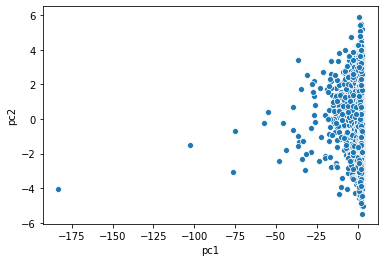

In [48]:
#PCA 
u, s, vt = np.linalg.svd(data_counties1_PCA_fillna2, full_matrices=False)
P = u @ np.diag(s)
df_1st_2_pcs =pd.DataFrame(P[:,0:2], columns=['pc1', 'pc2'])
first_2_pcs = df_1st_2_pcs

#jittered scatter plot (added noise)
first_2_pcs_jittered = first_2_pcs + np.random.normal(0, 0.1, size = (len(first_2_pcs), 2))
sns.scatterplot(data = first_2_pcs_jittered, x = "pc1", y = "pc2");

#a better looking scatter plot with labels
#import plotly.express as px
#px.scatter(data_frame = first_2_pcs_jittered, x = "pc1", y = "pc2", text = list(df_1972_to_2016.index)).update_traces(textposition = 'top center')

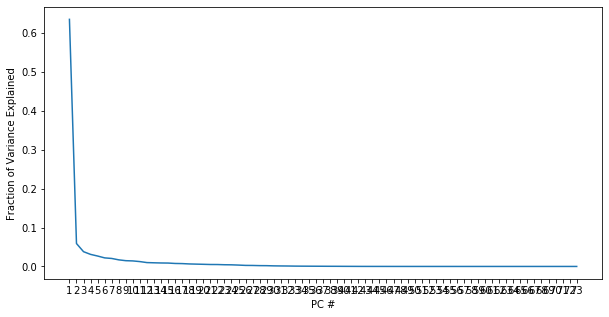

In [49]:
#scree plot
plt.figure(figsize = (10,5))
x = list(range(1, s.shape[0]+1)) 
plt.plot(x, s**2 / sum(s**2)); 
plt.xticks(x, x);
plt.xlabel('PC #');
plt.ylabel('Fraction of Variance Explained');

This plot doesn't make sense LOL why would latitude explain the variance this much. ???

## 2.3 Train-Test Split

#4 Let's do a train-test split.

In [63]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(time_since_first_case, test_size=0.1, random_state=42)

Let's do some feature selection. What are some good features to use to predict death rates? 

Some population percentage here. 

## 2.4 Model 1 : Classification 

### Basic Classification

#5 After selecting features, now we will make training set and test sets. 

In [64]:
X_train = train[timestamps]
Y_train = train['Mortality Rate']

X_train[:5], Y_train[:5]

(      stay at home  public schools  >500 gatherings  entertainment/gym  \
 891            9.0            -5.0             -8.0               -5.0   
 1710           5.0           -17.0            -15.0               -1.0   
 1457           0.0           -14.0            -18.0               -7.0   
 1566           8.0             2.0              0.0                7.0   
 259           15.0             5.0              6.0                9.0   
 
       restaurant dine-in  
 891                 -5.0  
 1710               -15.0  
 1457               -13.0  
 1566                 0.0  
 259                  9.0  ,
 891     3.415544
 1710    2.801318
 1457    2.955120
 1566    4.412052
 259     2.934254
 Name: Mortality Rate, dtype: float64)

Now we will make a linear regression model, fit the model with training data, and get the training loss. 

Loss function: I will use RMSE now but we can try other loss functions later. 

***Question: *** So what is a satisfying result loss for our model? How do we know how good our model is? 

In [65]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics



model = LinearRegression(fit_intercept=True) # should fit intercept be true?
model.fit(X_train, Y_train)

Y_prediction = model.predict(X_train)


training_loss = metrics.mean_squared_error(Y_prediction, Y_train)
print("Training loss: ", training_loss)

Training loss:  1.4598012004354963


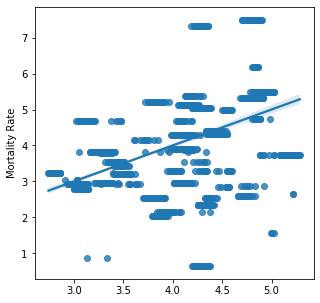

In [66]:
plt.figure(figsize = (5,5))
sns.regplot(Y_prediction, Y_train)

Should also check residual plot to make sure it has no pattern.

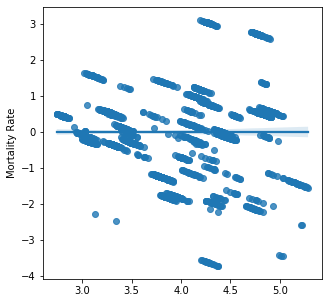

In [67]:
plt.figure(figsize = (5,5))
sns.regplot(Y_prediction, Y_train-Y_prediction)

## 2.5 Model 1 : Cross-Validation

#6 Now let's perform cross-validation to check whether we are overfitting, and determine which features are useful. 

In [68]:
# perform cross validation
from sklearn import model_selection as ms

# finding which features to use using Cross Validation
errors = []
range_of_num_features = range(1, X_train.shape[1] + 1)
for N in range_of_num_features:
    print(f"Trying first {N} features")
    model = LinearRegression()
    
    # compute the cross validation error
    error = ms.cross_val_score(model, X_train.iloc[:, 0:N], Y_train).mean()
    
    print("\tScore:", error)
    errors.append(error)

best_num_features = np.argmax(errors) + 1
print (best_num_features)
best_err = min(errors)

print(f"Best choice, use the first {best_num_features} features")

Trying first 1 features
	Score: 0.03477425495613462
Trying first 2 features
	Score: 0.12358635985175939
Trying first 3 features
	Score: 0.15953852396890794
Trying first 4 features
	Score: 0.16069907880546808
Trying first 5 features
	Score: 0.19511541723331255
5
Best choice, use the first 5 features


As we can see, these government actions do not much in terms of predicting the death rate of a county, so we might understand better the impetus behind the protests to reopen the country. 

## 2.x Regularization

#7 Here we perform regularization of data.

## 2.x Test

#8 Here we will test our model on test set and find its test accuracy. 

# §3. EDA and Model #2
Specifically, we explore on 2 data time-series: data_time_case & data_time_death

In [0]:
import time

$\color{red}{\text{DELETE THIS, variable name changed}}$.
3. data_covid_time_con	>	data_conf1
4. data_covid_time_dea >  data_death1

COVID-19 Project - An Intuitive Derivation of the SIR Model (for modeling pandemics)
Note: This is completely optional (we don't expect you to implement this and won't be grading you based on it), but for those who are interested, I think it can definitely be something interesting to look into (whether for this project or after this project)

Hey guys,

Over the last few days, for the COVID-19 project, I have seen quite a few students asking about the SIR model for potentially modeling the spread of a pandemic, so I want to explain the model a bit more in details and provide some intuitive backgrounds (although the models involve a system of ordinary differential equations, I want to point out that you don't have to have backgrounds in solving differential equations at all to understand SIR 😃):

SIR is a very well-known model for estimating the spread of pandemics. There are a lot of other more complex modern models that are built upon SIR.

In this post, I will build on basic probability intuitions in the scope of this course and numerical examples so it doesn't require any differential equations background.

A. Some Backgrounds about SIR

The SIR model is also called a compartmental model, it intends to separate the population into several components (compartments):
- Susceptible (Can be infected but currently healthy)
- Infected (Already carrying the disease)
- Recovered (Have been infected before, cannot be infected again)

B. The 3 Main Variables $$S(t), I(t), R(t)$$

In the paradigm set out by SIR, the 3 components mentioned above are thought of as functions that depend on time, so this gives us $$S(t), I(t), R(t)$$.

C. The 4 Key Parameters $$\beta, D, \gamma, N$$

There are a few more parameters that go into this model (SIR model uses days for units of time).

Suppose we have a particular disease $$Z$$, and suppose there is a 20% chance of a healthy person being infected by $$Z$$, and suppose the average number of people a person is in contact with per day is 10. Every day, on average, we expect the individual to infect $$20\% \times 10 = 2$$ people per day. We call this number the beta ($$\beta$$) parameter, the expected number of people an infected person infects in a day.

Since now we have an estimate of how many people can get infected by one infected person per day, it makes sense to wonder how many such days there will be. In other words, we would like to know the length of the period when a person is ill and can infect others, and let's call this parameter $$D$$. Now, suppose the length of this infection period is 5 days. On average, we would expect that a person infected with $$Z$$ to infect $$2 \times 5 = 10$$ other people in total. We call $$10$$ the basic reproduction number $$R_o$$, the total number of people an infected person expect to infect. And as we can see here: $$R_o = \beta \times D$$. There is nothing too unexpected here.

We have actually got almost all of our parameters for the SIR model, but just one last thing. Since $$D$$ is the number of days someone can carry and spread the disease, intuitively we know that $$1/D$$ can represent the proportion of infected recovering every day. If you think about it, the person who got infected in the first place will take $D$ days in total to recover, so on average, $$1/D$$ gets recovered every day. We call this the rate of recovery and use the symbol $$\gamma$$ (gamma) to denote it. Building more on our examples, if we have 20 people infected so far and $$D=5$$, we expected $$1/5$$ out of the 20 people to recover per day. We also can see that $$R_o = \beta \times (1/\gamma) = \beta / \gamma$$.

To actually get to the final SIR model, we can start simple. Many of you have tried at least some or all of the following parameters when conducting EDA or selecting features for your COVID-19 project:
- The number of infected patients per day
- The number of recovered patients per day
- The number of susceptible patients per day

These are pretty much the same as the $$S(t), I(t), R(t)$$ mentioned before, and we would like to see how these quantities change over time.

Before going forward, I'd like to recap on some of the parameters we have already defined in the introduction above for disease $$Z$$:
- $$\beta = 2$$: the expected number of people an infected person infects in a day
- $$D = 5$$: the length of the period when a person is ill and can infect others
- $$\gamma = 1/D=0.2$$: the rate of recovery

Let's also assume there is a total population of 100 (We use $$N$$ to represent the total population).

D. Derivation of How $$S(t)$$ Change Per Day

Suppose on day 1, we have 50 people already infected, and 40 people are still susceptible to $$Z$$. We know that $$I(t) = 50, S(t)=40$$, and $$R(t) = N - I(t) - S(t) = 100 - 50 - 40 = 10$$. What happens the next day exactly?

We have 50 infected people, and according to $$\beta$$, each of them can infect 2 other people per day. However, we know $$S(t) = 40$$, or in other words, $$40\%$$ of the population can still be infected. Hence, the additional number of people expected to be infected by the next day would be $$50 * 2 * 40\% = 40$$ people. Note that all of these 40 people come from the susceptible population. Hence, we lose 40 people from $$S$$ to $$I$$.


Hence, we just figured out the first equation in the SIR model!

The change of # people susceptible to the disease by the next day is equal to the additional number of people that can still be infected based on $$\beta$$ and the original susceptible population (during the previous day).

$$\text{Change in } S(t) = -\beta \times I(t) \times \frac{S(t)}{N}$$

Think for a second to see if that is consistent with our numerical example above, especially on why it is negative.

E. Derivation of How $$I(t)$$ Change Per Day

We just figured out how the number of susceptible (but not yet infected) people change. What about the number of people currently infected? How does that change?

First thing to note that is since we have new people getting infected (based on the first equation we just derived). We know part of our additional number of infected people comes from that! So the change in $$I(t)$$ contains the term $$\beta \times I(t) \times \frac{S(t)}{N}$$. However, we also have a portion of the people who actually recover every day (otherwise, we are going to see an exponential trend with more people infected but nobody recovered (like a zombie apocalypse)). How do we figure out the number of people who actually recover per day? We have the $$\gamma$$ parameter! Hence, every day we will have $$\gamma \times I(t)$$ patients recover from the disease.

Numerically, we have $$I(t) = 50, \gamma = 0.2$$, so $$10$$ people are expected to recover by the next day. And since we gain 40 additional people from the susceptible population, the actual additional number of people who will be infected tomorrow is equal to $$40 - 10 = 30$$.

In symbolic terms, we have:

$$\text{Change in } I(t) = \beta \times I(t) \times \frac{S(t)}{N} - \gamma \times I(t)$$

F. Derivation of How $$R(t)$$ Change Per Day

Finally, the only variable we haven't looked at is how $R(t)$, the number of people who recovered, change. Well, we have actually already calculated that in part previously! 

Since 10 additional people are expected to recover by the next day, we gain those 10 people from $$I$$ to $$R$$!.

Symbolically, this gives us:

$$\text{Change in } R(t) = \gamma \times I(t)$$.

G. Completing the Notations (Not super important)

Now, just one more thing...from Calculus, we would like to give change in a variable over time a different notation $$d/dt$$, and that's just what we are going to do:

$$\begin{aligned} \frac{dS}{dt} &= -\beta \times I(t) \times \frac{S(t)}{N} \\ \frac{dI}{dt} &= \beta \times I(t) \times \frac{S(t)}{N} - \gamma \times I(t) \\ \frac{dR}{dt} &= \gamma \times I(t) \end{aligned}$$

H. Iterative (For-Loop) Representation (No Differential Equations)

For those of you looking for an iterative/recursive representation for the actual number of people susceptible/infected/recovered (does not involve differential equations!!), we can just add the change to the previous number, much like distance moved in 2 seconds = distance moved in 1 second + 1 second * velocity (change in distance per second)

$$\begin{aligned} S(t + 1) &= S(t) -\beta \times I(t) \times \frac{S(t)}{N} \\ I(t + 1) &= I(t) + \beta \times I(t) \times \frac{S(t)}{N} - \gamma \times I(t) \\ R(t+1) &= R(t) + \gamma \times I(t) \end{aligned}$$

There we have it! The SIR model as you have seen them! Note the rate of change represents the number of ADDITIONAL people susceptible/infected/recovered, not the actual number. So if the rate is positive, we know the number increases; if it is negative, it decreases.

H. A Quick Note on How to Implement this in Python

The SIR model is represented by nothing more than the 3 variables along with 3 (or 2 depending on whether you really count $$\gamma$$) key parameters. 

Since it shows how everything changes over time, all you have to do is to figure out / estimate what the initial number of infected/recovered/susceptible people are (don't forget there is also the basic reproduction number, and $$R_o = \beta \times D$$, which you can use to solve for $$\beta$$!). 

Let's say you have 3 variables initial_infected, initial_recovered, and initial_susceptible, you can just utilize the equations to iteratively calculate for every additional day how the 3 variables will actually change. The numerical examples I showed above presented ONE such round of calculation. In reality, you can just repeat that in a for loop.

Here is an example of how we simulate $$S(t), I(t), R(t)$$ will actually change over time based on the SIR model using the parameters we defined in the numerical examples:

$$\beta = 2, \gamma = 0.2, D = 5, N = 100$$


Note in this particular simulation, I chose the initial number of people susceptible to the virus as the entire population except one exposed person ($$S(0) = N - 1 = 99$$) and the number of people infected to be 0. ($$I(0) = 0$$). Assume on day 1 there is 1 person exposed to the disease. (so we can get the disease spread started, otherwise we will just end up with nothing happening at all since there is 0 exposure)

## 9. Conclusion

#9 We can also fit other models (like logistic model?) with our training data, and test on test set about their accuracy.